<a href="https://colab.research.google.com/github/HuanAII/HuanAII/blob/main/linearRegressionUsingNumpy_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# Load the data
data = np.genfromtxt('/content/advertising_data.csv', delimiter=',',skip_header=1)
N=data.shape[0]

# Extract features and labels
data_tv = data[:, 0].reshape(N, 1)
data_radio = data[:, 1].reshape(N, 1)
data_newspaper = data[:, 2].reshape(N, 1)
data_sales = data[:, 3].reshape(N, 1)
print(data_sales.dtype)

# Create feature matrix by stacking ones (bias term) and areas
features = np.hstack([np.ones((N, 1)), data_tv, data_radio, data_newspaper])
prices = np.array(data_sales)
# Function to make predictions (forward pass)
def predict(x, theta):
    return x.T.dot(theta)

# Function to compute gradient
def gradient(y_hat, y, x):
    dtheta = 2 * (y_hat - y)
    return dtheta

# Function to update weights
def update_weight(theta, lr, dtheta):
    theta_new = theta - lr * dtheta
    return theta_new
#train one sample
# Initialize parameters
lr = 0.01
epoch_max = 10
theta = np.array([0.049, -0.34,0.1,0.1])

# Training loop
for epoch in range(epoch_max):
    for i in range(N):
        # Get a sample
        x = features[i, :]
        y = prices[i]

        # Predict y_hat
        y_hat = predict(x, theta)

        # Compute loss
        loss = (y_hat - y) * (y_hat - y)

        # Compute gradient
        dtheta = gradient(y_hat, y, x)

        # Update weights
        theta = update_weight(theta, lr, dtheta)




float64


[[1.  6.7]
 [1.  4.6]
 [1.  3.5]
 [1.  5.5]]
[[ 0.049]
 [-0.34 ]]
[[0.32972023]
 [1.23758712]]


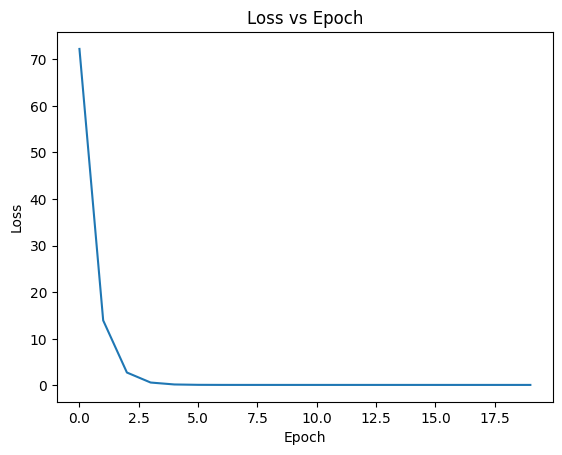

In [ ]:
data = np.array([[6.7, 9.1],
                   [4.6, 5.9],
                   [3.5, 4.6],
                   [5.5, 6.7]])
#train n data
n=data.shape[0]
areas=data[:,0:1]
prices=data[:,1:2]
data=np.hstack([np.ones((n,1)),areas])
print(data)
theta=np.array([[0.049],[-0.34]])
print(theta)
losses=[]
for epoch in range(20):
  x=data
  y=prices
  y_hat=x.dot(theta)
  loss=(y_hat-y)*(y_hat-y)
  losses.append(np.mean(loss))
  #compute gradient
  dtheta=x.T.dot(2*(y_hat-y))
  theta=update_weight(theta,0.01,dtheta/n)
print(theta)
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs Epoch')
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Load the data
data = np.genfromtxt('/content/advertising_data.csv', delimiter=',', skip_header=1)

# Extract features and labels
X = data[:, :3]  # 3 features
y = data[:, 3:]  # Labels
N = data.shape[0]  # Số mẫu

# Scale the features (mean normalization)
def mean_normalization(X):
    maxi = np.max(X)
    mini = np.min(X)
    avg = X.mean()
    X_norm = (X - avg) / (maxi - mini)
    return X_norm, maxi, mini, avg

X, maxi, mini, avg = mean_normalization(X)
x_b = np.hstack([np.ones((N, 1)), X])  # Thêm cột bias vào X

# Predict function
def predict(X, theta):
    return X.dot(theta)

# Initialize weights
def initialize_weights():
    w1 = np.random.rand()  # Trọng số ngẫu nhiên từ 0 đến 1
    w2 = np.random.rand()  # Trọng số ngẫu nhiên từ 0 đến 1
    w3 = np.random.rand()  # Trọng số ngẫu nhiên từ 0 đến 1
    b = np.random.rand()
    w=np.array([[w1],[w2],[w3],[b]])
    return w

# Gradient descent
def gradient_decent(X, y, n_epochs, learning_rate):
    losses = []
    theta = initialize_weights()  # Khởi tạo vector trọng số ngẫu nhiên
    for j in range(n_epochs):
        for i in range(N):
            xi = X[i:i+1]  # Lấy mẫu i
            yi = y[i:i+1]  # Lấy nhãn i

            # Tính dự đoán và loss
            y_hat = predict(xi, theta)
            loss = (y_hat - yi)**2

            # Gradient descent step
            d_li = 2 * (y_hat - yi)
            d_l = xi.T.dot(d_li)  # Gradient theo theta
            theta = theta - learning_rate * d_l

        # Lưu lại loss nếu cần
        losses.append(loss.mean())

    return theta, losses

# Training
n_epochs = 100
learning_rate = 0.01
a=initialize_weights()
print(a.shape)
theta, losses = gradient_decent(x_b, y, n_epochs, learning_rate)

print("Theta (weights):", theta)


(4, 1)
Theta (weights): [[11.67400037]
 [14.91323411]
 [ 1.75877711]
 [ 3.2535382 ]]


In [ ]:
def mini_batch_gradient_decent(X, y, n_epochs, learning_rate, batch_size):
    theta = initialize_weights()  # Khởi tạo trọng số ngẫu nhiên
    losses = []

    # Trộn chỉ số
    shuffled_indices = np.random.permutation(len(X))
    X = X[shuffled_indices]
    y = y[shuffled_indices]

    for j in range(n_epochs):
        for i in range(0, N, batch_size):
            xi = X[i:i + batch_size]  # Lấy mini-batch
            yi = y[i:i + batch_size]

            output = predict(xi, theta)  # Dự đoán
            loss = ((output - yi) ** 2 )/2 # Tính loss
            loss_gradient = (output - yi) / batch_size  # Tính gradient

            d_l = xi.T.dot(loss_gradient)  # Tính gradient cho theta
            theta = theta - learning_rate * d_l
            losses.append(np.sum(loss) / batch_size)  # Lưu loss trung bình
    return theta, losses
#training
theta, losses = mini_batch_gradient_decent(x_b, y, n_epochs, learning_rate,2)

print("Theta (weights):", theta)


Theta (weights): [[12.19577299]
 [10.6780585 ]
 [-0.20863718]
 [ 0.10008961]]


Theta (weights): [[11.96306079]
 [ 4.92964239]
 [-0.94253313]
 [ 0.02154913]]


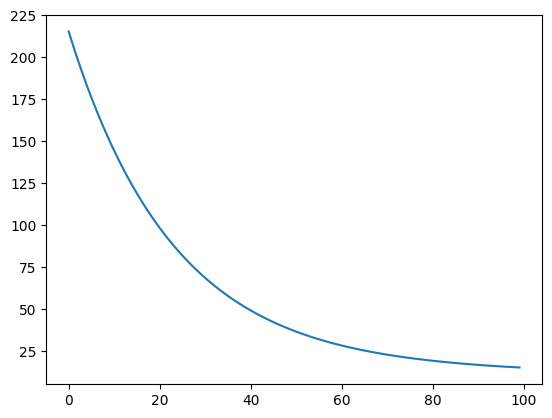

In [ ]:
#Toan bo sample
def batch_gradient_decent(X,y,n_epochs,learning_rate):
  theta=initialize_weights()
  losses=[]
  for j in range(n_epochs):
    output=predict(X, theta)
    loss=((output-y)**2)
    loss_gradient=2*(output-y)/N
    d_l=X.T.dot(loss_gradient)
    theta=theta-learning_rate*d_l
    losses.append(np.sum(loss)/N)
  return theta,losses

theta, losses = batch_gradient_decent(x_b, y, n_epochs, learning_rate)
print("Theta (weights):", theta)
plt.plot(losses)
plt.show()

In [ ]:
#Truonghop data set khong qua lon thi ta co the dung normal_equationm
def normal_equation(X, y):
    return np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
normal_theta = normal_equation(x_b, y)
print("Theta (weights):", normal_theta)


Theta (weights): [[13.91547737]
 [15.4118025 ]
 [17.3349738 ]
 [ 4.40941317]]


In [5]:
#K_ford_Validation
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_b, y , test_size=0.2,random_state=42)
k=5
step_fold=int(X_train.shape[0]/k)
x_fold1=X_train[:step_fold,:]
y_fold1=y_train[:step_fold,:]
x_fold2=X_train[step_fold:2*step_fold,:]
y_fold2=y_train[step_fold:2*step_fold,:]
y_fold3=y_train[2*step_fold:3*step_fold,:]
x_fold3=X_train[2*step_fold:3*step_fold,:]
y_fold4=y_train[3*step_fold:4*step_fold,:]
x_fold4=X_train[3*step_fold:4*step_fold,:]
x_fold5=X_train[4*step_fold:,:]
y_fold5=y_train[4*step_fold:,:]
#chia du lieu
#crossValidation
cr_x_train_1=np.r_(x_fold2,x_fold3,x_fold4,x_fold5)
cr_y_train_1=np.r_(y_fold2,y_fold3,y_fold4,y_fold5)
cr_x_test_1=x_fold5
cr_y_test_1=y_fold5
bgd_thetas1,losses1=batch_gradient_decent(cr_x_train_1,cr_y_train_1,n_epochs,learning_rate)
rms_1=compute_rms(bgd_thetas[-1],cr_x_test_1,cr_y_test_1)#kiem tra do loi
#tuong tu voi tung X_train khac





NameError: name 'X_b' is not defined

In [7]:
#Ung dung thu vien
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
#StratifiedKFord




kf=KFold(n_splits=5,shuffle=True)
for i , (train_index,test_index) in enumerate(kf.split(X_train, y_train )):

  #tra ve mot mang train_index , test_index
  print(f"Fold {i+1}:")
  print(f"Train: index={train_index}")
  print(f"Test: index={test_index}")
  #ham tinh
  bgd_thetas1,losses1=batch_gradient_decent(cr_x_train_1,cr_y_train_1,n_epochs,learning_rate)
  rms_1=compute_rms(bgd_thetas[-1],cr_x_test_1,cr_y_test_1)#kiem tra do loi
  print(f"RMS: {rms_1}")



NameError: name 'X_train' is not defined